<a href="https://colab.research.google.com/github/joni901/Benford_Law/blob/main/Benford_LawEAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to graphically demonstrate that Benford's Law is observed in companies, and that the more a company is audited, the more its results show reliable conformity with Benford's Law.

The first step in this project is to download the data from the CVM, which is where the company data is available.

# ETL

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=07333fb2a3b41d43140bac718be2c7a8279f0b2016a44b2ef183dd101e93d6a4
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [ ]:
import requests
import json
import wget
import pandas as pd
from zipfile import ZipFile

# Base URL where the CVM files are hosted
base_url = "https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/DADOS/"
zip_files = []

# Create a list with the names of ZIP files from 2018 to 2023
for year in range(2018, 2024):
    zip_files.append(f"itr_cia_aberta_{year}.zip")

# Download and extract all ZIP files
for file_name in zip_files:
    wget.download(base_url + file_name)
    with ZipFile(file_name, 'r') as zipObj:
        zipObj.extractall("CVM")

prefix = "itr_cia_aberta_"
types = ["ind_", "con_"]
file_types = ["BPA_", "BPP_", "DFC_MD_", "DFC_MI_", "DMPL_", "DRA_", "DRE_", "DVA_"]
list_of_dfs = []
path = "/content/"

# Loop through all combinations of file types, report types, and years
for file_type in file_types:
    for t in types:
        for year in range(2018, 2023):
            try:
                print(f"{path}{prefix}{file_type}{t}{year}")
                df = pd.read_csv(f"{path}{prefix}{file_type}{t}{year}.csv",
                                 sep="|", encoding="ISO-8859-1", decimal=",")
                df = pd.DataFrame(df)
                df['Source'] = f"{prefix}{file_type}{t}{year}"
                list_of_dfs.append(df)
            except:
                print(f"File {prefix}{file_type}{t}{year} not found")


/content/itr_cia_aberta_BPA_ind_2018
File itr_cia_aberta_BPA_ind_2018 not found
/content/itr_cia_aberta_BPA_ind_2019
File itr_cia_aberta_BPA_ind_2019 not found
/content/itr_cia_aberta_BPA_ind_2020
File itr_cia_aberta_BPA_ind_2020 not found
/content/itr_cia_aberta_BPA_ind_2021
File itr_cia_aberta_BPA_ind_2021 not found
/content/itr_cia_aberta_BPA_ind_2022
File itr_cia_aberta_BPA_ind_2022 not found
/content/itr_cia_aberta_BPA_con_2018
File itr_cia_aberta_BPA_con_2018 not found
/content/itr_cia_aberta_BPA_con_2019
File itr_cia_aberta_BPA_con_2019 not found
/content/itr_cia_aberta_BPA_con_2020
File itr_cia_aberta_BPA_con_2020 not found
/content/itr_cia_aberta_BPA_con_2021
File itr_cia_aberta_BPA_con_2021 not found
/content/itr_cia_aberta_BPA_con_2022
File itr_cia_aberta_BPA_con_2022 not found
/content/itr_cia_aberta_BPP_ind_2018
File itr_cia_aberta_BPP_ind_2018 not found
/content/itr_cia_aberta_BPP_ind_2019
File itr_cia_aberta_BPP_ind_2019 not found
/content/itr_cia_aberta_BPP_ind_2020
Fil

In [ ]:
import os
import pandas as pd

folder_path = '/content/CVM'  # Replace with the actual path
all_files = os.listdir(folder_path)

# Dictionary to store DataFrames by year
dfs_by_year = {
    2018: [],
    2019: [],
    2020: [],
    2021: [],
    2022: [],
    2023: []
}

# Iterate through files in the folder
for file in all_files:
    file_path = os.path.join(folder_path, file)

    # Check if the file is of the desired type (CSV or Excel)
    for year in range(18, 24):
        if file.endswith(f'{year}.csv'):
            try:
                df = pd.read_csv(file_path, encoding='latin1', delimiter=';')  # Try 'latin1'
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='cp1252')  # Try 'cp1252' if 'latin1' fails
                except UnicodeDecodeError:
                    print(f"Could not read file {file_path} due to an encoding error.")
                    continue
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        else:
            continue  # Ignore files that are not of the desired type

        # Add the DataFrame to the correct list based on the year
        dfs_by_year[year + 2000].append(df)

# Concatenate DataFrames for each year
for year in dfs_by_year:
    if dfs_by_year[year]:
        dfs_by_year[year] = pd.concat(dfs_by_year[year], ignore_index=True)


In [ ]:
nivel_1={'ALPARGATAS S.A.':'ALPA','BANCO BMG S.A.':'BMGB','BCO BRADESCO S.A.':'BBDC','BCO ESTADO DO RIO GRANDE DO SUL S.A.':'BRSR',
         'BCO MERCANTIL DO BRASIL S.A.':'BMEB','BCO PAN S.A.':'BPAN','BRADESPAR S.A.':'BRAP','BRASKEM S.A.':'BRKM',
         'CENTRAIS ELET BRAS S.A. - ELETROBRAS'	:'ELET','CIA ENERGETICA DE MINAS GERAIS - CEMIG':'CMIG',
         'CIA FERRO LIGAS DA BAHIA - FERBASA':'FESA','CIA FIACAO TECIDOS CEDRO CACHOEIRA':'CEDO',
         'CTEEP - CIA TRANSMISSÃO ENERGIA ELÉTRICA PAULISTA':'TRPL', 'DEXXOS PARTICIPACOES S.A.':'DEXP',
        'EUCATEX S.A. INDUSTRIA E COMERCIO':'EUCA', "FRAS-LE S.A.":	'FRAS', "GERDAU S.A.":'GGBR', "IGUATEMI S.A.":"IGTI",
         "ITAU UNIBANCO HOLDING S.A.":"ITUB","ITAUSA S.A.":"ITSA","METALURGICA GERDAU S.A.":"GOAU","OI S.A.":"OIBR",
         "RANDON S.A. IMPLEMENTOS E PARTICIPACOES":"RAPT", "USINAS SID DE MINAS GERAIS S.A.-USIMINAS":'USIM'}


nivel_2={
    "ALUPAR INVESTIMENTO S/A":"ALUP", "AZUL S.A.":"AZUL","BCO ABC BRASIL S.A.":"ABCB", "BCO BTG PACTUAL S.A.":"BPAC",
    "BCO PINE S.A.":"PINE", "BR ADVISORY PARTNERS PARTICIPAÇÕES S.A.":"BRBI", "CENTRAIS ELET DE SANTA CATARINA S.A.":"CLSC",
    "CIA PARANAENSE DE ENERGIA - COPEL":"CPLE", "CIA SANEAMENTO DO PARANA - SANEPAR":"SAPR", "CSN MINERAÇÃO S.A.":"CMIN",
    "ENERGISA S.A.":"ENGI", "GOL LINHAS AEREAS INTELIGENTES S.A.":"GOLL", "KLABIN S.A.":"KLBN", "MARCOPOLO S.A.":"POMO",
    "MULTIPLAN - EMPREEND IMOBILIARIOS S.A.":"MULT", "PETROLEO BRASILEIRO S.A. PETROBRAS":"PETR", "RAIZEN S.A.":"RAIZ",
    "RENOVA ENERGIA S.A.":"RNEW", "TAURUS ARMAS S.A.":"TASA", "TRACK & FIELD CO S.A.":"TFCO",
    "TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.":"TAEE"
}

NovoMercado={
    "3R PETROLEUM ÓLEO E GÁS S.A":"RRRP", "AERIS IND. E COM. DE EQUIP. GERACAO DE ENERGIA S/A":"AERI",
    "AES BRASIL ENERGIA S.A.":"AESB",'AGROGALAXY PARTICIPAÇÕES S.A.':"AGXY", "ALLIANÇA SAÚDE E PARTICIPAÇÕES S.A.":"ALLD",
    "ALLOS S.A	":"ALOS", 'ALLPARK EMPREENDIMENTOS PARTICIPACOES SERVICOS S.A':'ALPK',"ALPHAVILLE S.A.":"AVLL",
    "AMBIPAR PARTICIPACOES E EMPREENDIMENTOS S/A":"AMBP", "AMERICANAS S.A. - EM RECUPERAÇÃO JUDICIAL":"AMER","ANIMA HOLDING S.A.":"ANIM",
    "AREZZO INDÚSTRIA E COMÉRCIO S.A.":"ARZZ","ARMAC LOCAÇÃO. LOGÍSTICA E SERVIÇOS S.A.":"ARML",
    "ATACADÃO S.A.":'CRFB', 'AUREN ENERGIA S.A.':"AURE", "B3 S.A. - BRASIL. BOLSA. BALCÃO":"B3SA",
    "BB SEGURIDADE PARTICIPAÇÕES S.A.":"BBSE", "BCO BRASIL S.A.":"BBAS","BEMOBI MOBILE TECH S.A.":'BMOB',
    'BLAU FARMACÊUTICA S.A.':"BLAU", "BOA SAFRA SEMENTES S.A.":"SOJA", "BRASILAGRO - CIA BRAS DE PROP AGRICOLAS":"AGRO",
    "BRF S.A.":"BRFS", "BRISANET PARTICIPAÇÕES S.A.":"BRIT","CAIXA SEGURIDADE PARTICIPAÇÕES S.A.":"CXSE",
    "CAMIL ALIMENTOS S.A.":"CAML", "CCR S.A.":"CCRO", "CEA MODAS S.A.":"CEAB", "CIA BRASILEIRA DE DISTRIBUICAO":"PCAR",
    "CIA SANEAMENTO BASICO EST SAO PAULO":"SBSP", "CIA SANEAMENTO DE MINAS GERAIS-COPASA":"CSMG",
    "CIELO S.A. - INSTITUIÇÃO DE PAGAMENTO":"CIEL", "CLEAR SALE S.A.":"CLSA", "CM HOSPITALAR S.A.":"VVEO",
    "COGNA EDUCAÇÃO S.A.":"COGN","COMPANHIA BRASILEIRA DE ALUMÍNIO":'CBAV','CONSTRUTORA TENDA S.A.':"TEND",
    'COSAN S.A.':'CSAN', 'CPFL ENERGIA S.A.':'CPFE', 'CRUZEIRO DO SUL EDUCACIONAL S.A.':'CSED',
    'CSU DIGITAL S.A.':'CSUD', 'CURY CONSTRUTORA E INCORPORADORA S.A.':"CURY",
    "CVC BRASIL OPERADORA E AGÊNCIA DE VIAGENS S.A.":"CVCB", 'CYRELA BRAZIL REALTY S.A.EMPREEND E PART':"CYRE",
    "D1000 VAREJO FARMA PARTICIPAÇÕES S.A.":"DMVF", "DESKTOP S.A.":"DESK", "DEXCO S.A.":"DXCO",
    "DIAGNOSTICOS DA AMERICA S.A.":"DASA", "DIMED S.A. DISTRIBUIDORA DE MEDICAMENTOS":"PNVL",
    "DIRECIONAL ENGENHARIA S.A.":"DIRR", "DOTZ S.A.":"DOTZ", "ECORODOVIAS INFRAESTRUTURA E LOGÍSTICA S.A.":"ECOR",
    "ELETROMIDIA S.A.":"ELMD", "EMBRAER S.A.":"EMBR", "EMPREENDIMENTOS PAGUE MENOS S.A.":"PGMN",
    "NAUTA PARTICIPAÇÕES S.A.":"ENAT","ENEVA S.A":"ENEV","ENGIE BRASIL ENERGIA S.A.":"EGIE",
    "ENJOEI S.A.":"ENJU", "EQUATORIAL ENERGIA S.A.":"EQTL", "ETERNIT S.A.":"ETER",
    "EVEN CONSTRUTORA E INCORPORADORA S.A.":"EVEN", "EZ TEC EMPREEND. E PARTICIPACOES S.A.":"EZTC",
    "FERTILIZANTES HERINGER S.A.":'FHER', "FLEURY S.A.":"FLRY", "GAFISA S.A.":"GFSA",
    "GETNINJAS S.A.":"NINJ", "GPS PARTICIPACOES E EMPREENDIMENTOS S.A.":"GGPS",
    "GRENDENE S.A.":"GRND", "GRUPO CASAS BAHIA S.A.":"BHIA", "GRUPO DE MODA SOMA S.A.":'SOMA','GRUPO MATEUS S.A.':"GMAT",
    "GRUPO SBF SA":"SBFG","GUARARAPES CONFECCOES S.A.":'GUAR',"HAPVIDA PARTICIPACOES E INVESTIMENTOS SA":"HAPV",
    "HBR REALTY EMPREENDIMENTOS IMOBILIARIOS S/A":"HBRE", "HELBOR EMPREENDIMENTOS S.A.":"HBOR", "HIDROVIAS DO BRASIL S.A.":"HBSA",
    "HOSPITAL MATER DEI S/A":"MATD", "HYPERA S.A.":"HYPE", "INFRACOMMERCE CXAAS S.A.":"IFCM",
    "INTELBRAS S.A. IND DE TELEC ELETRONICA BRASILEIRA":"INTB", "INTERNATIONAL MEAL COMPANY ALIMENTACAO S.A.":"MEAL",
    "IOCHPE MAXION S.A.":"MYPK", "IRANI PAPEL E EMBALAGEM S.A.":'RANI', "IRB - BRASIL RESSEGUROS S.A.":"IRBR",
    "JALLES MACHADO S.A.":"JALL", "JBS S.A.":"JBSS", "JHSF PARTICIPACOES S.A.":"JHSF", "JSL S.A.":"JSLG",
    "KEPLER WEBER S.A.":'KEPL', "KORA SAÚDE PARTICIPAÇÕES S.A":'KRSA', "LAVVI EMPREENDIMENTOS IMOBILIÁRIOS S.A.":"LAVV",
    "LIGHT S.A.":"LIGT", 'LIVETECH DA BAHIA INDUSTRIA E COMERCIO S/A':"LVTC", 'LOCALIZA RENT A CAR S.A.':"RENT",
    'LOCAWEB SERVIÇOS DE INTERNET S.A.':"LWSA", "LOG COMMERCIAL PROPERTIES":"LOGG", "LOG-IN LOGISTICA INTERMODAL S.A.":'LOGN',
    'LOJAS QUERO-QUERO S/A':'LJQQ', "LOJAS RENNER S.A.":'LREN',"LPS BRASIL - CONSULTORIA DE IMOVEIS S.A.":"LPSB",
    "LUPATECH S.A.":'LUPA', "M.DIAS BRANCO S.A. IND COM DE ALIMENTOS":"MDIA", "MAGAZINE LUIZA S.A.":"MGLU",
    "MAHLE-METAL LEVE S.A.":"LEVE", "MARFRIG GLOBAL FOODS S.A.":"MRFG", "MARISA LOJAS S.A.":"AMAR",
    "MÉLIUZ S.A.":'CASH', 'MELNICK DESENVOLVIMENTO IMOBILIÁRIO S.A.':"MELK", "METALFRIO SOLUTIONS S.A.":'FRIO',
    'MILLS LOCAÇÃO. SERVIÇOS E LOGÍSTICA S.A':'MILS', 'MINERVA S.A.':'BEEF','MITRE REALTY EMPREENDIMENTOS E PARTICIPAÇÕES S.A.':'MTRE',
    "MOBLY S.A.":"MBLY", "MOURA DUBEUX ENGENHARIA S/A":'MDNE', 'MOVIDA PARTICIPACOES SA':"MOVI", 'MPM CORPÓREOS S.A.':'ESPA',
    'MRV ENGENHARIA E PARTICIPACOES S.A.':'MRVE', "MULTILASER INDUSTRIAL S.A.":'MLAS',"NATURA &CO HOLDING S.A.":"NTCO",
    "NEOENERGIA S.A.":'NEOE',"NEOGRID PARTICIPACOES S.A.":"NGRD", "NEXPE PARTICIPAÇÕES S.A":"NEXP",
    "OCEANPACT SERVICOS MARITIMOS S.A.":"OPCT", "ODONTOPREV S.A.":"ODPV", "ONCOCLINICAS DO BRASIL SERVICOS MEDICOS S.A.":'ONCO',
    "ORIZON VALORIZACAO DE RESIDUOS S.A.":'ORVR', "OSX BRASIL S.A.":'OSXB', "OURO FINO SAUDE ANIMAL PARTICIPACOES S.A.":'OFSA',
    "PADTEC HOLDING S.A.":"PDTC", "PARANAPANEMA S.A.":"PMAM", "PBG S/A":"PTBL", "PDG REALTY S.A. EMPREEND E PARTICIPACOES":"PDGR",
    "PET CENTER COMERCIO E PARTICIPACOES S.A.":"PETZ", "PETRORECÔNCAVO S.A.":"RECV",
    "PLANO & PLANO DESENVOLVIMENTO IMOBILIÁRIO S.A.":"PLPL", "POMIFRUTAS S/A":"FRTA", "PORTO SEGURO S.A.":"PSSA",
    "POSITIVO TECNOLOGIA S.A.":"POSI", "PRINER SERVIÇOS INDUSTRIAIS S.A.":"PRNR", "PRIO S.A.":"PRIO",
    "PROFARMA DISTRIB PROD FARMACEUTICOS S.A.":"PFRM", "QUALICORP CONSULTORIA E CORRETORA DE SEGUROS S.A.":"QUAL",
    "RAIA DROGASIL S.A.":"RADL","REDE DOR SÃO LUIZ S.A.":"RDOR", "RNI NEGÓCIOS IMOBILIÁRIOS S.A.":"RDNI","ROMI S.A.":"ROMI",
    "ROSSI RESIDENCIAL S.A.":"RSID", "RUMO S.A.":"RAIL", "SANTOS BRASIL PARTICIPACOES S.A.":"STBP",
    "SAO CARLOS EMPREEND E PARTICIPACOES S.A.":'SCAR', "SAO MARTINHO S.A.":"SMTO", "SENDAS DISTRIBUIDORA S.A.":'ASAI',
    "SEQUOIA LOGISTICA E TRANSPORTES S.A":"SEQL", "SER EDUCACIONAL S.A.":'SEER', 'SERENA ENERGIA S.A.':"SRNA",
    "SIMPAR S.A.":'SIMH', "SLC AGRICOLA S.A.":"SLCE", "SMARTFIT ESCOLA DE GINÁSTICA E DANÇA S.A.":	"SMFT",
    "SPRINGS GLOBAL PARTICIPACOES S.A.":"SGPS", "SUZANO S.A.":"SUZB", "SYN PROP E TECH S.A.":"SYNE",
    'T4F ENTRETENIMENTO S.A.':"SHOW", 'TC S.A.':"TRAD", "TECHNOS S.A.":"TECN", "TECNISA S.A.":'TCSA',
    "TEGMA GESTAO LOGISTICA S.A.":"TGMA", 'TERRA SANTA PROPRIEDADES AGRICOLAS S.A.':"LAND", "TIM S.A.":"TIMS",
    "TOTVS S.A.":"TOTS", "TPI - TRIUNFO PARTICIP. E INVEST. S.A.":"TPIS", "TRÊS TENTOS AGROINDUSTRIAL S/A":"TTEN",
    'TRISUL S.A.':"TRIS", "TUPY S.A.":"TUPY", "ULTRAPAR PARTICIPACOES S.A.":"UGPA","UNICASA INDÚSTRIA DE MÓVEIS S.A.":"UCAS",
    "UNIFIQUE TELECOMUNICAÇÕES S.A.":"FIQE", "VALE S.A.":"VALE", "VALID SOLUÇÕES S.A.":"VLID",
    "VAMOS LOCAÇÃO DE CAMINHÕES. MÁQUINAS E EQUIP. S.A.":'VAMO', "VESTE S.A. ESTILO":"VSTE", "VIBRA ENERGIA S.A.":"VBBR",
    'VITTIA S.A.':"VITT", "VIVARA PARTICIPAÇOES S.A.":"VIVA", "VIVER INCORPORADORA E CONSTRUTORA S.A.":"VIVR", 'VULCABRAS S.A.':'VULC',
    "WEG S.A.":"WEGE", 'WESTWING COMERCIO VAREJISTA S.A.':'WEST', 'WILSON SONS S.A.':'PORT',
    "WIZ CO PARTICIPAÇÕES E CORRETAGEM DE SEGUROS S.A.":"WIZC", "YDUQS PARTICIPACOES S.A.":	"YDUQ"
}

#1. Novo Mercado

* Definition: Novo Mercado is a special segment of B3 created to promote best corporate governance practices among publicly traded companies.

 Requirements for companies:

* Must issue only common shares (no preferred shares).

* Must give tag-along rights of 100% for all shareholders in case of control changes.

* Must disclose financial information transparently, following stricter rules than those for regular companies.

* Implication: Companies listed in Novo Mercado are considered highly transparent and reliable; investors often see them as safer and better governed.

# 2. Lista 1 (Level 1 Corporate Governance)

* Definition: Level 1 companies voluntarily adopt enhanced governance practices, but less strict than Novo Mercado.

Requirements:

* Must comply with basic disclosure and transparency rules.

* Tag-along rights are usually 80% for common shares, less than Novo Mercado.

* Must follow certain corporate governance agreements.

* Implication: Level 1 companies are considered better governed than standard companies, but not as rigorous as Novo Mercado.

# 3. Lista 2 (Level 2 Corporate Governance)

* Definition: Level 2 companies adopt more governance rules than Level 1, closer to Novo Mercado standards.

Requirements:

* Usually provide tag-along rights of 100% for common shares, like Novo Mercado.

* Must enhance shareholder rights and improve transparency.

* Must follow certain enhanced disclosure rules.

* Implication: Level 2 companies are more reliable and transparent than Level 1, but still not in the Novo Mercado.

# 4. Companies Not in Any List

* Definition: These are regular B3-listed companies that do not adopt any additional governance standards.

Implication:

* They follow only mandatory regulatory requirements.

* Tag-along rights and transparency are standard/minimal.

* They are usually considered less transparent or less regulated compared to companies in Novo Mercado or Level 1/2.

In [ ]:
# Function to check the company's level
def check_company(company):
    if company in nivel_1.keys():
        return "lista_1"
    elif company in nivel_2.keys():
        return "lista_2"
    elif company in NovoMercado.keys():
        return "NovoMercado"
    else:
        return None

# Apply the classification
for year, df in dfs_by_year.items():
    df['code'] = df['DENOM_CIA'].apply(check_company)


In [ ]:
import numpy as np

# Function to count the first digit in a column and return relative frequencies (percentages)
def count_first_digits(df):
    digit_frequency = {}
    total_count = 0

    for num in df['VL_CONTA']:
        # Convert value to string and remove negative sign and leading zeros
        str_num = str(num).lstrip('-').lstrip('0')
        # Check if the string is not empty and starts with a valid digit (1-9)
        if str_num and str_num[0].isdigit() and str_num[0] != '0':
            first_digit = str_num[0]
            total_count += 1  # Only count valid digits
            # Increment the count in the dictionary
            if first_digit in digit_frequency:
                digit_frequency[first_digit] += 1
            else:
                digit_frequency[first_digit] = 1

    # Convert counts to percentages
    for digit in digit_frequency:
        digit_frequency[digit] = (digit_frequency[digit] / total_count) * 100 if total_count > 0 else 0

    return digit_frequency

# Function to calculate the expected Benford distribution for a given digit, in percentages
def benford_distribution(d):
    return np.log10(1 + 1 / d) * 100

# Function to calculate the expected Benford distribution for digits 1 to 9
def benford_law():
    return [benford_distribution(d) for d in range(1, 10)]


Analyzing year 2018:
First-digit frequencies for category lista_1 in year 2018:
{'1': 30.868830925126666, '3': 11.8521298555076, '4': 10.114468005254269, '2': 17.035091011446802, '5': 7.821354850816288, '6': 6.62976168136611, '7': 6.068680803152562, '8': 5.0985175455057234, '9': 4.511165321823982}
First-digit frequencies for category lista_2 in year 2018:
{'4': 9.194556822361163, '5': 7.542163610571113, '1': 30.22119476698366, '2': 18.010823306888035, '3': 12.194609362685862, '6': 7.310986181894603, '7': 6.01061314558924, '8': 4.938790521725425, '9': 4.576262281300898}
First-digit frequencies for category NovoMercado in year 2018:
{'1': 30.247656482902542, '3': 12.377303492364938, '6': 6.742189196450589, '4': 9.713036469432145, '2': 17.483539253681354, '9': 4.660903105183157, '7': 5.777915180690965, '5': 7.909623233851171, '8': 5.087833585443143}
Analyzing year 2019:
First-digit frequencies for category lista_1 in year 2019:
{'1': 30.86046894733952, '2': 17.134332729302805, '5': 7.5723

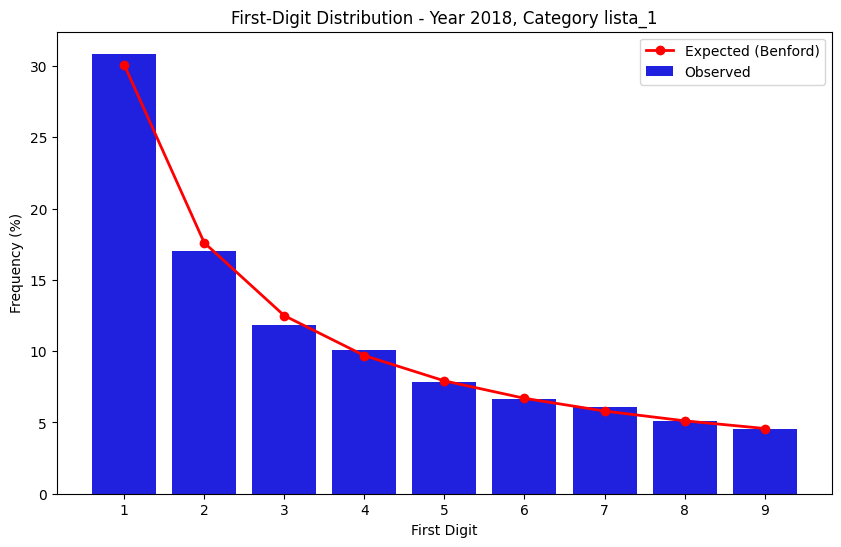

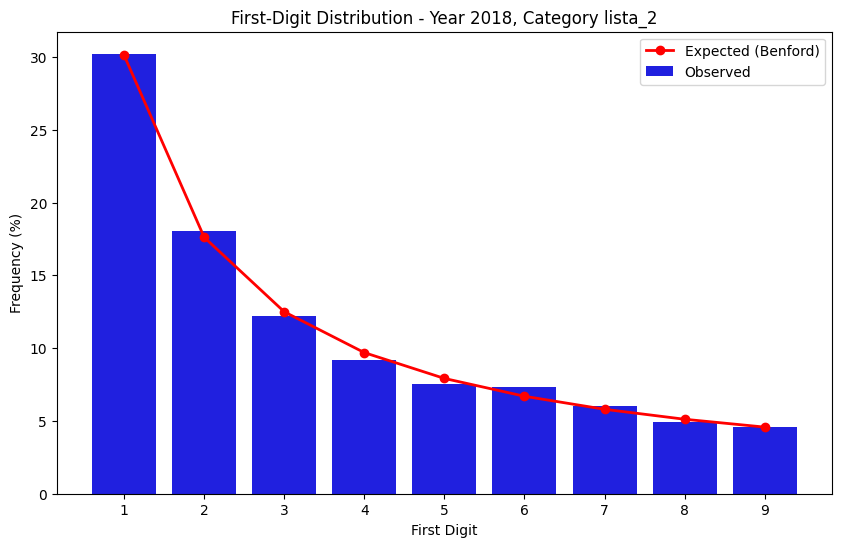

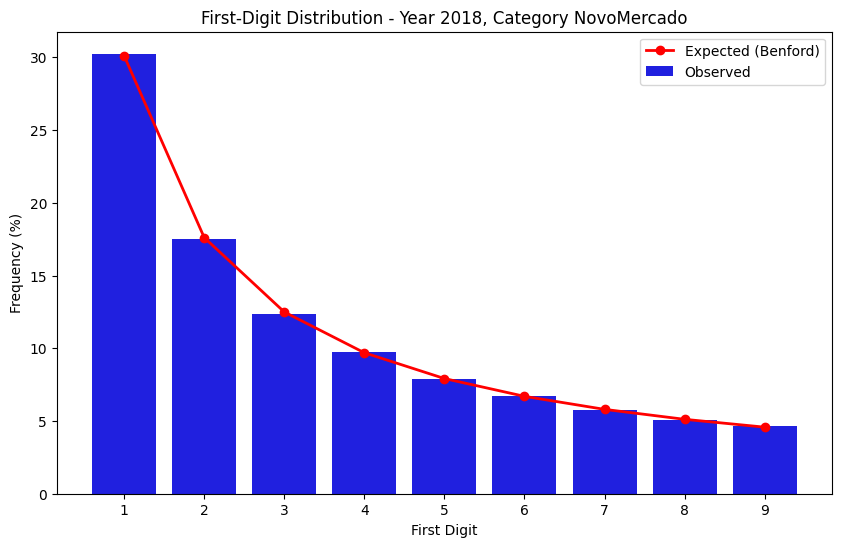

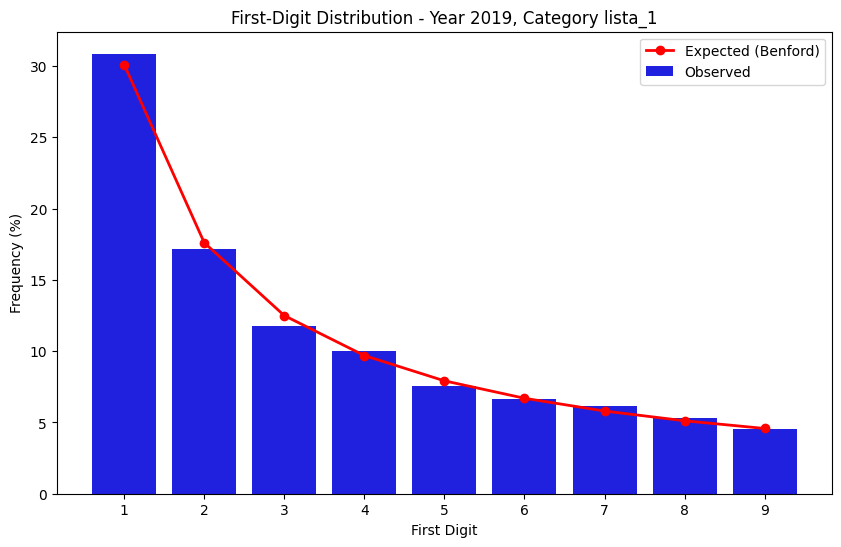

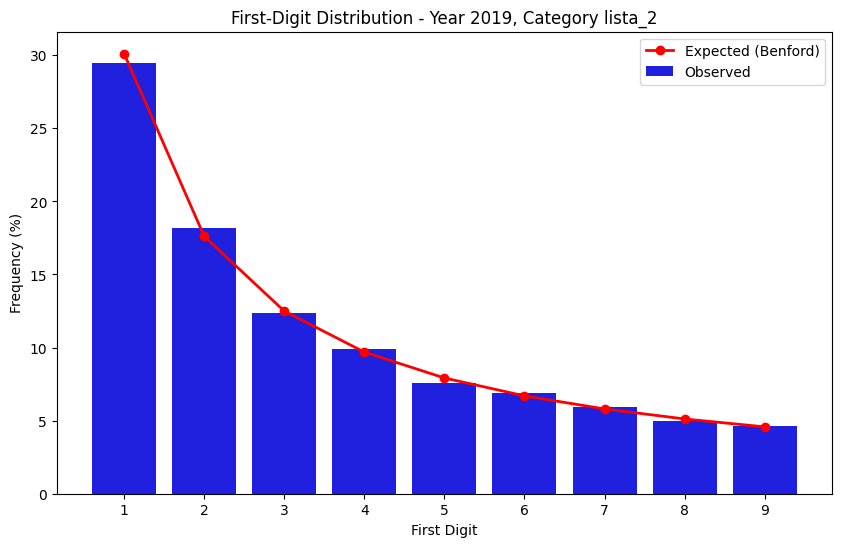

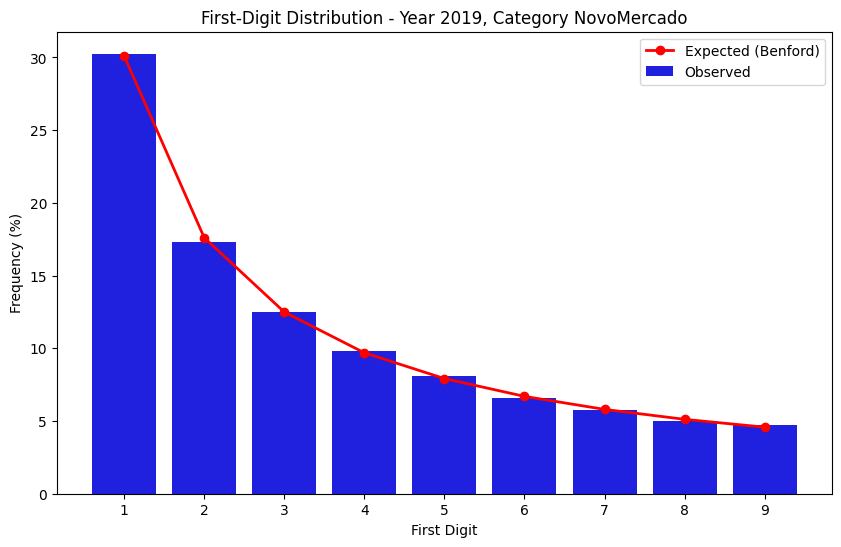

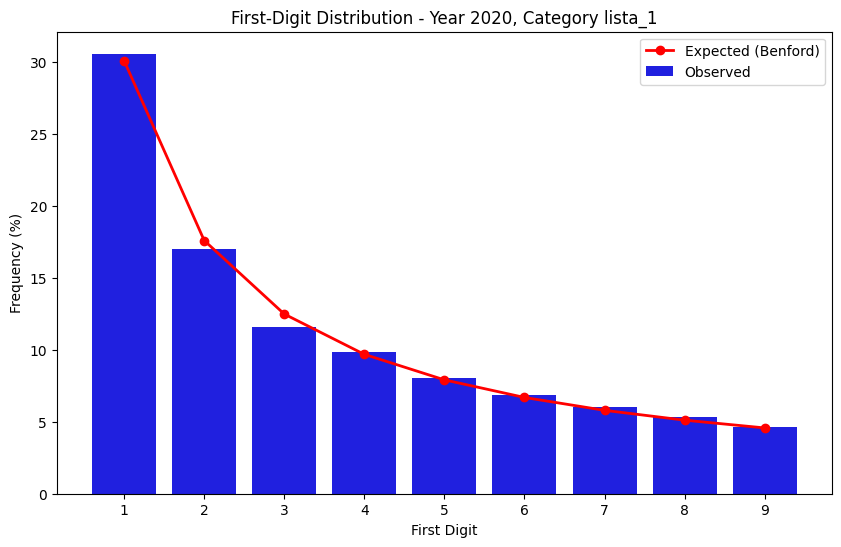

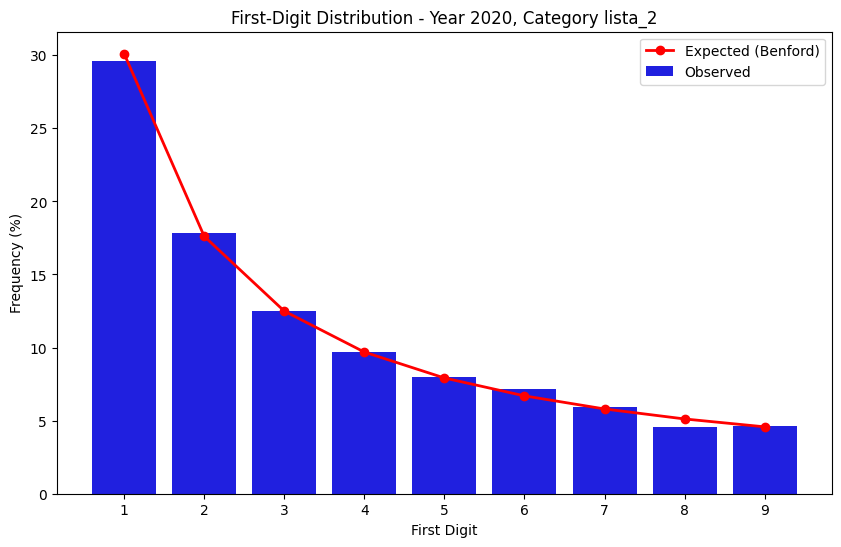

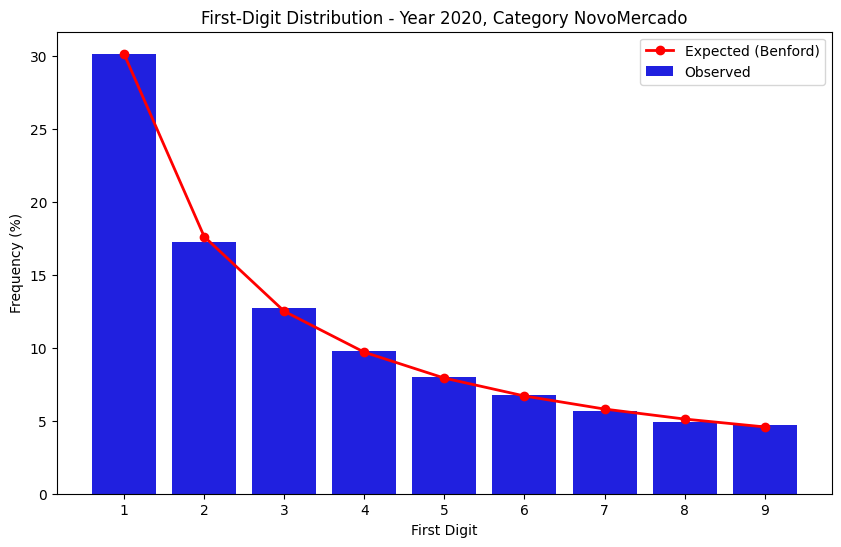

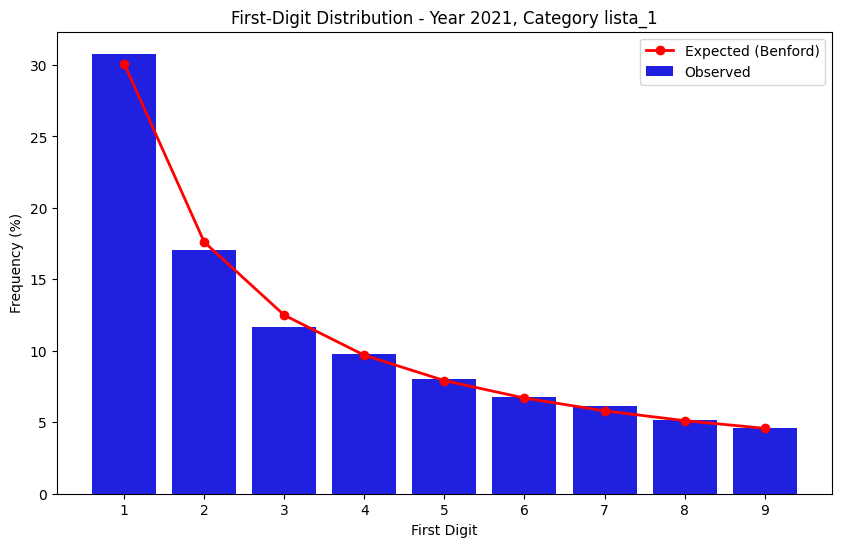

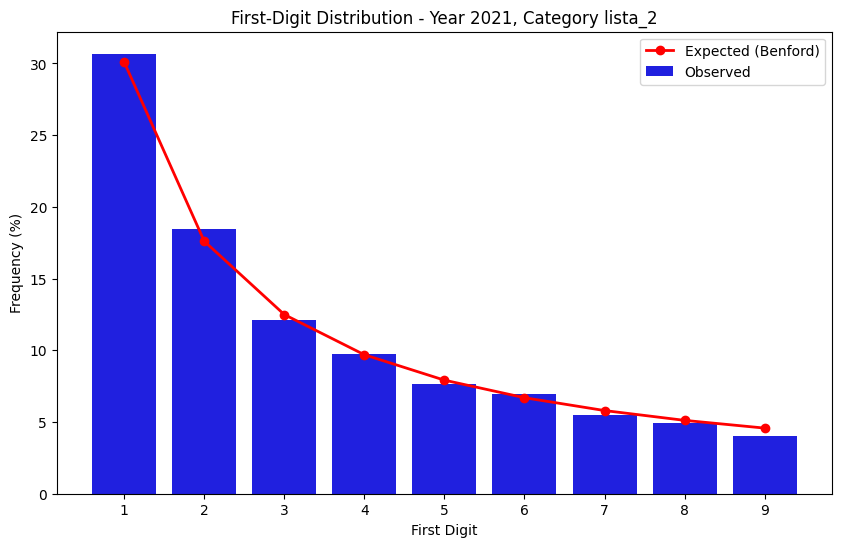

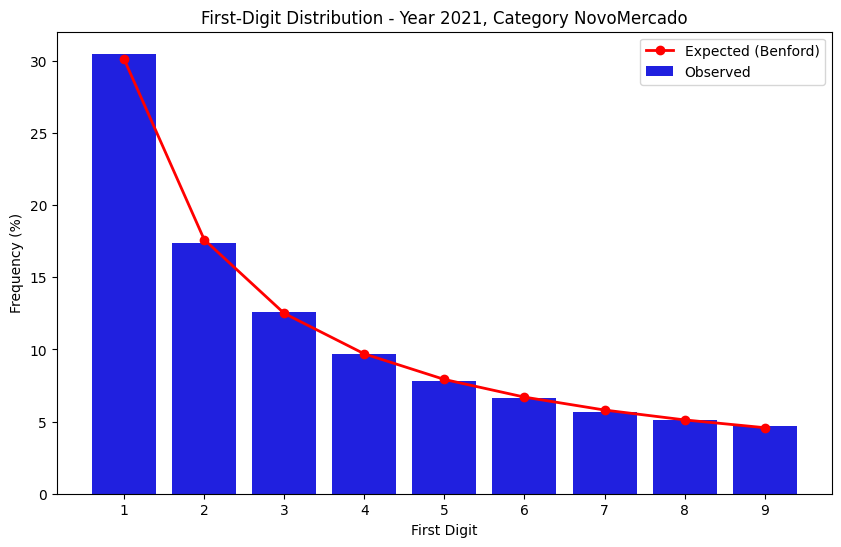

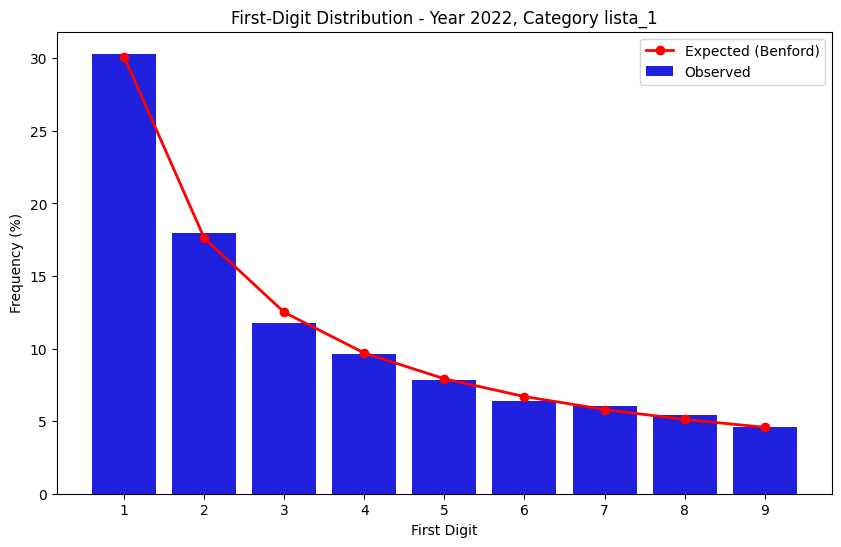

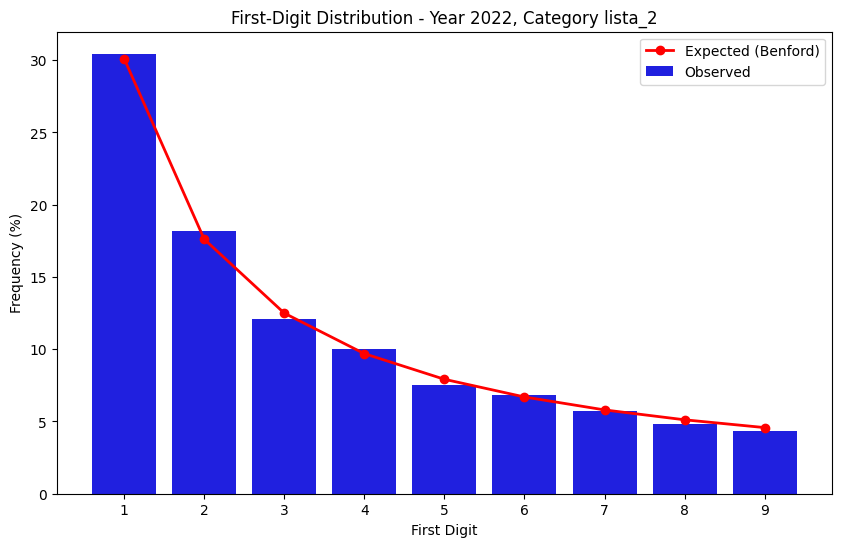

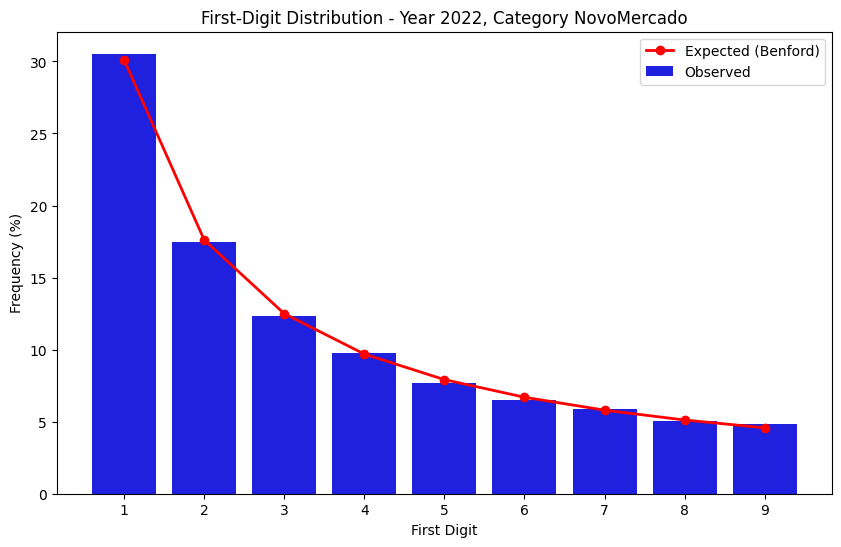

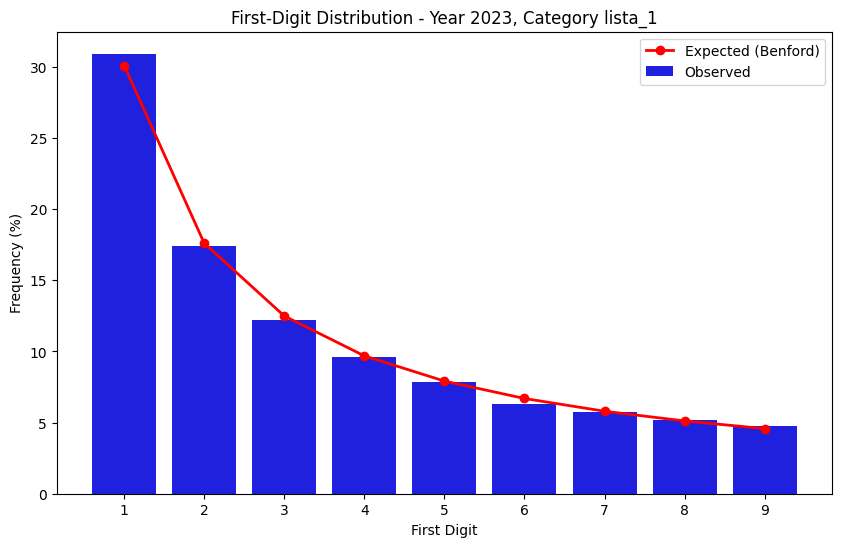

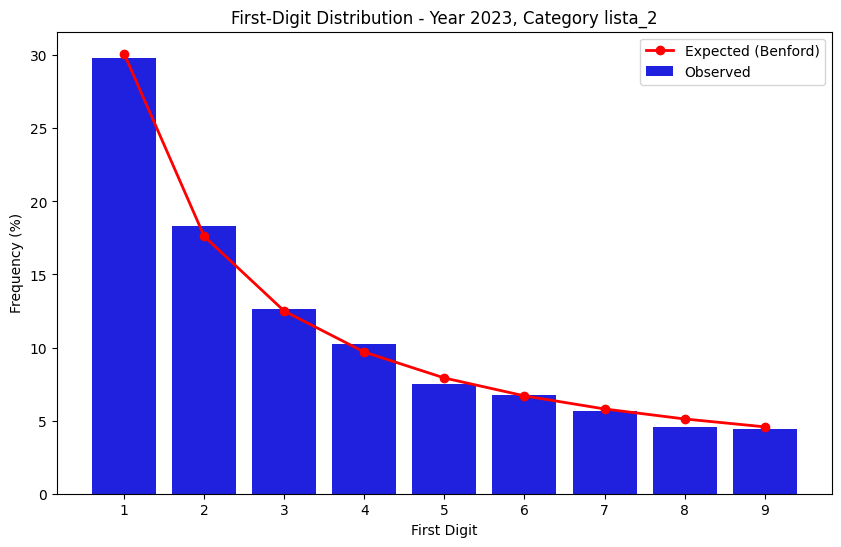

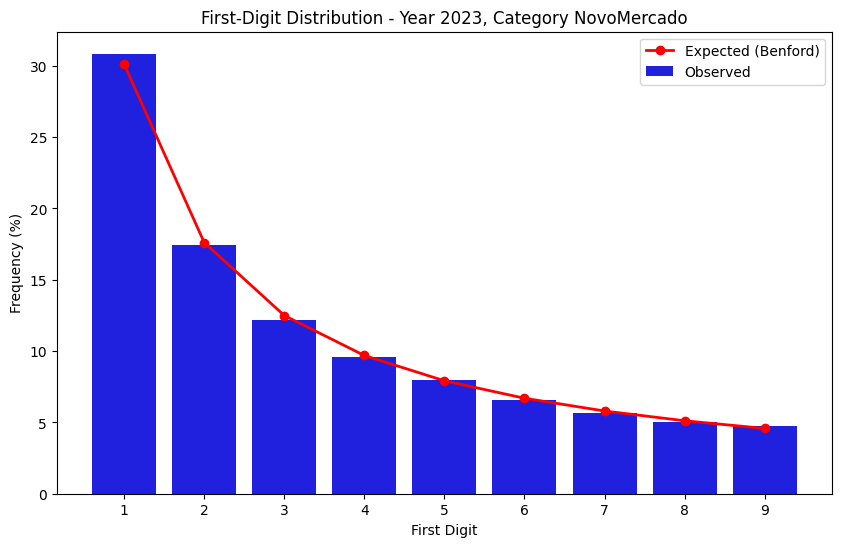

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionaries to store expected and observed digit distributions by year and category
digit_expected = {year: {} for year, df in dfs_by_year.items()}
digit_observed = {year: {} for year, df in dfs_by_year.items()}

# Iterate through the years in order
for year, df in sorted(dfs_by_year.items()):
    print(f"Analyzing year {year}:")

    # Calculate first-digit distributions for each category
    for category in ["lista_1", "lista_2", "NovoMercado"]:
        # Filter the DataFrame for the current category
        df_category = df[df['code'] == category]

        if df_category.empty:
            print(f"No data for category {category} in year {year}.")
            continue

        # Get first-digit frequencies for the category
        freq_category = count_first_digits(df_category)
        print(f"First-digit frequencies for category {category} in year {year}:")
        print(freq_category)

        # Calculate the observed distribution in percentages for digits 1-9
        total_observed = sum(freq_category.values())
        observed_perc = [(freq_category.get(str(d), 0) / total_observed) * 100 for d in range(1, 10)]
        digit_observed[year][category] = observed_perc

        # Calculate the expected Benford distribution in percentages
        benford_percentages = [benford_distribution(d) for d in range(1, 10)]
        digit_expected[year][category] = benford_percentages

# Plot the observed vs expected distributions
for year in digit_observed.keys():
    for category in digit_observed[year].keys():
        plt.figure(figsize=(10, 6))

        # Observed distribution (blue bars)
        sns.barplot(x=list(range(1, 10)), y=digit_observed[year][category], color='blue', label='Observed')

        # Expected distribution (red line)
        plt.plot(range(0, 9), digit_expected[year][category], color='red', marker='o', linestyle='-', linewidth=2, label='Expected (Benford)')

        # Titles and labels
        plt.title(f"First-Digit Distribution - Year {year}, Category {category}")
        plt.xlabel("First Digit")
        plt.ylabel("Frequency (%)")
        plt.legend()
        plt.show()


# Nova seção

Analyzing year 2018:
Analyzing year 2019:
Analyzing year 2020:
Analyzing year 2021:
Analyzing year 2022:
Analyzing year 2023:


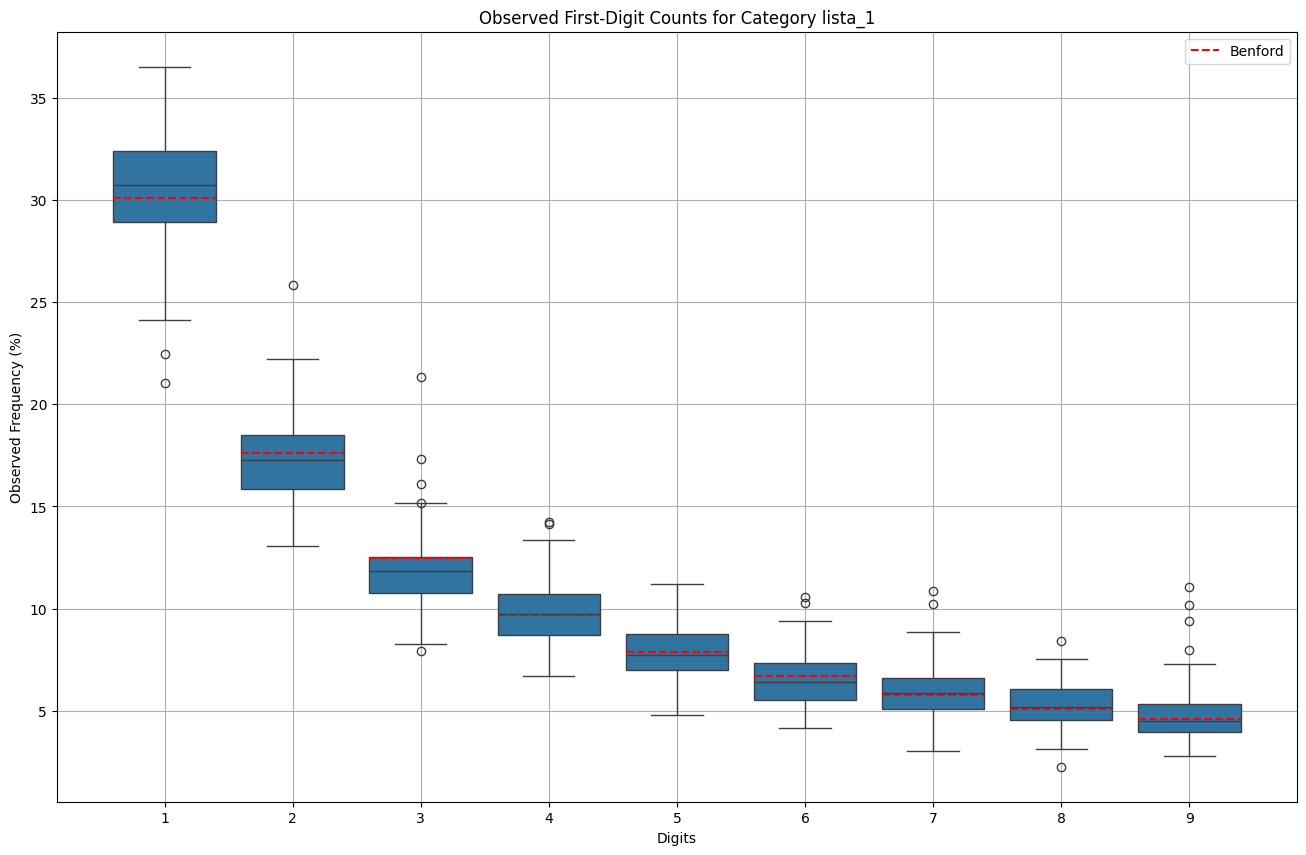

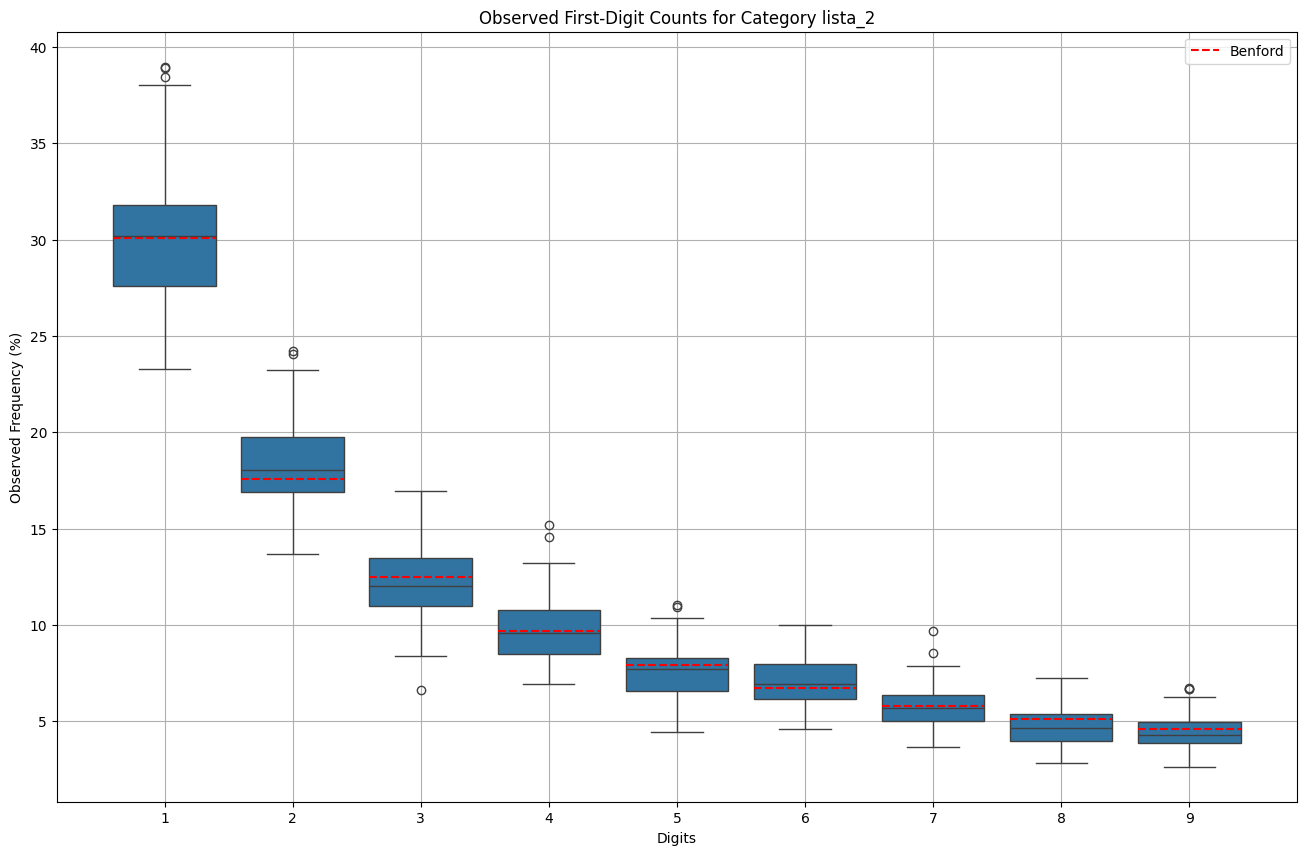

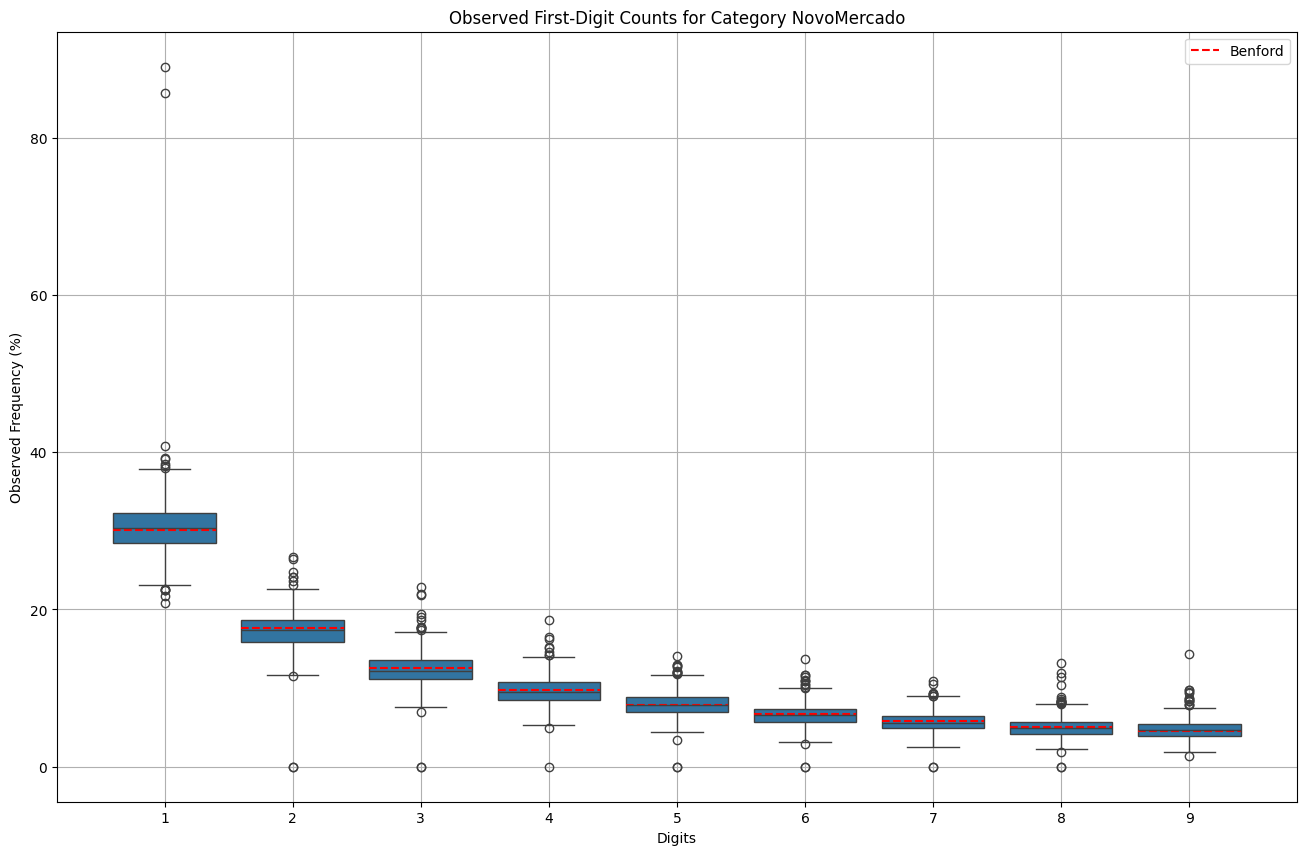

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store first-digit counts per company
digit_counts_by_company = {category: {} for category in ["lista_1", "lista_2", "NovoMercado"]}
years = []

# Iterate through years
for year, df in dfs_by_year.items():
    print(f"Analyzing year {year}:")
    years.append(year)

    # Count digits for each company within each category
    for category in ["lista_1", "lista_2", "NovoMercado"]:
        # Filter the DataFrame for the current category
        df_category = df[df['code'] == category]

        if df_category.empty:
            print(f"No data for category {category} in year {year}.")
            continue

        # Iterate over each company in the category
        for company in df_category['DENOM_CIA'].unique():
            df_company = df_category[df_category['DENOM_CIA'] == company]

            # Get percentage frequencies of first digits for the company
            freq_company = count_first_digits(df_company)  # Make sure to adjust the column if needed

            # Store digit counts in the dictionary per company
            if company not in digit_counts_by_company[category]:
                digit_counts_by_company[category][company] = []
            digit_counts_by_company[category][company].append({
                'year': year,
                'digit_counts': freq_company
            })

# Transform results into a DataFrame for boxplots
data_for_boxplot = []
benford_perc = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]  # Expected Benford distribution

for category, companies in digit_counts_by_company.items():
    for company, values in companies.items():
        for entry in values:
            for digit in range(1, 10):
                data_for_boxplot.append({
                    'Category': category,
                    'Company': company,
                    'Year': entry['year'],
                    'Digit': str(digit),  # Keep digits as strings to maintain order
                    'Observed (%)': entry['digit_counts'].get(str(digit), 0),
                    'Benford (%)': benford_perc[digit - 1]
                })

df_boxplot = pd.DataFrame(data_for_boxplot)

# Create a boxplot for each category with the Benford line as reference
for category in df_boxplot['Category'].unique():
    plt.figure(figsize=(16, 10))
    data = df_boxplot[df_boxplot['Category'] == category]
    sns.boxplot(
        x='Digit',
        y='Observed (%)',
        data=data,
        order=[str(d) for d in range(1, 10)]
    )

    # Add horizontal lines for Benford's Law
    for i, perc in enumerate(benford_perc):
        plt.hlines(
            y=perc,
            xmin=i - 0.4,
            xmax=i + 0.4,
            color='red',
            linestyles='--',
            label='Benford' if i == 0 else ""
        )

    plt.title(f"Observed First-Digit Counts for Category {category}")
    plt.xlabel("Digits")
    plt.ylabel("Observed Frequency (%)")
    plt.legend()
    plt.grid(True)
    plt.show()


Relationship Between Corporate Governance (B3) and Benford's Law Conformity

The analysis of the first-digit frequency charts (Box Plots) demonstrates a clear positive correlation: the higher the B3 Corporate Governance Level, the greater the conformity of the financial data with Benford's Law.

Conformity with Benford's Law indicates that the data is natural and not manipulated. The degree of dispersion (width of the boxes) is the main indicator of this relationship:

# Novo Mercado (Highest Rigor):

* Highest Conformity: The median is very close to the Benford line.

* Lowest Dispersion: The boxes (interquartile range) are the narrowest.

* Conclusion: The high governance rigor (e.g., 100% common shares, greater board independence) results in more homogeneous and reliable data, making manipulation and the occurrence of anomalies difficult.

# Level 2 (Intermediate):

* Good Conformity: The median remains close to the Benford line.

* Moderate Dispersion: The boxes are slightly wider than those in the Novo Mercado.

* Conclusion: This reflects a high governance standard, but with slightly more variation in data quality compared to the highest rigor segment.

# Level 1 (Lowest Rigor):

* Lowest Conformity / Highest Anomaly Risk: The median may still be close, but there is significant dispersion.

* Highest Dispersion: The boxes are the widest, and there are more extreme outliers.

* Conclusion: The lower level of governance requirement among the differentiated segments translates to greater variability or inconsistency in the data, as indicated by the larger spread of results.

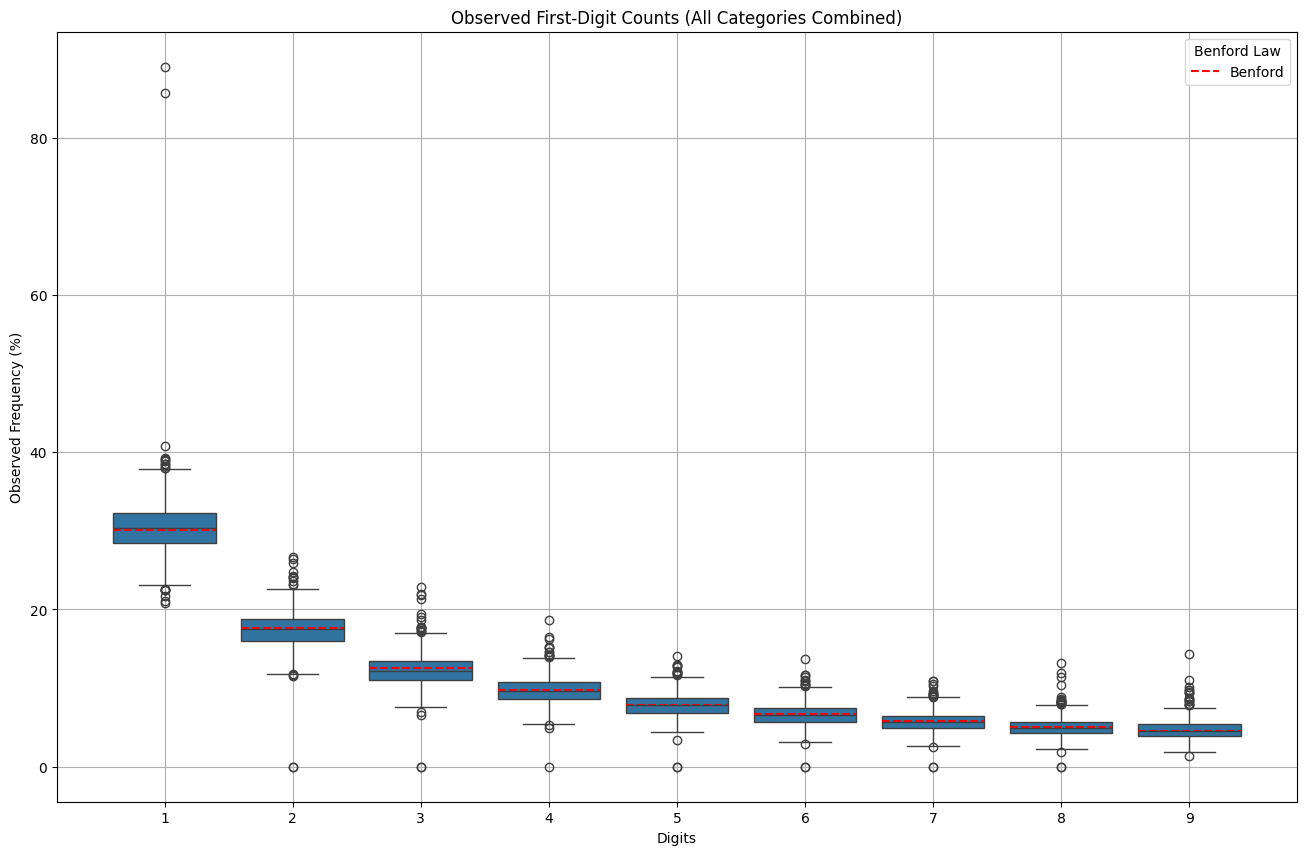

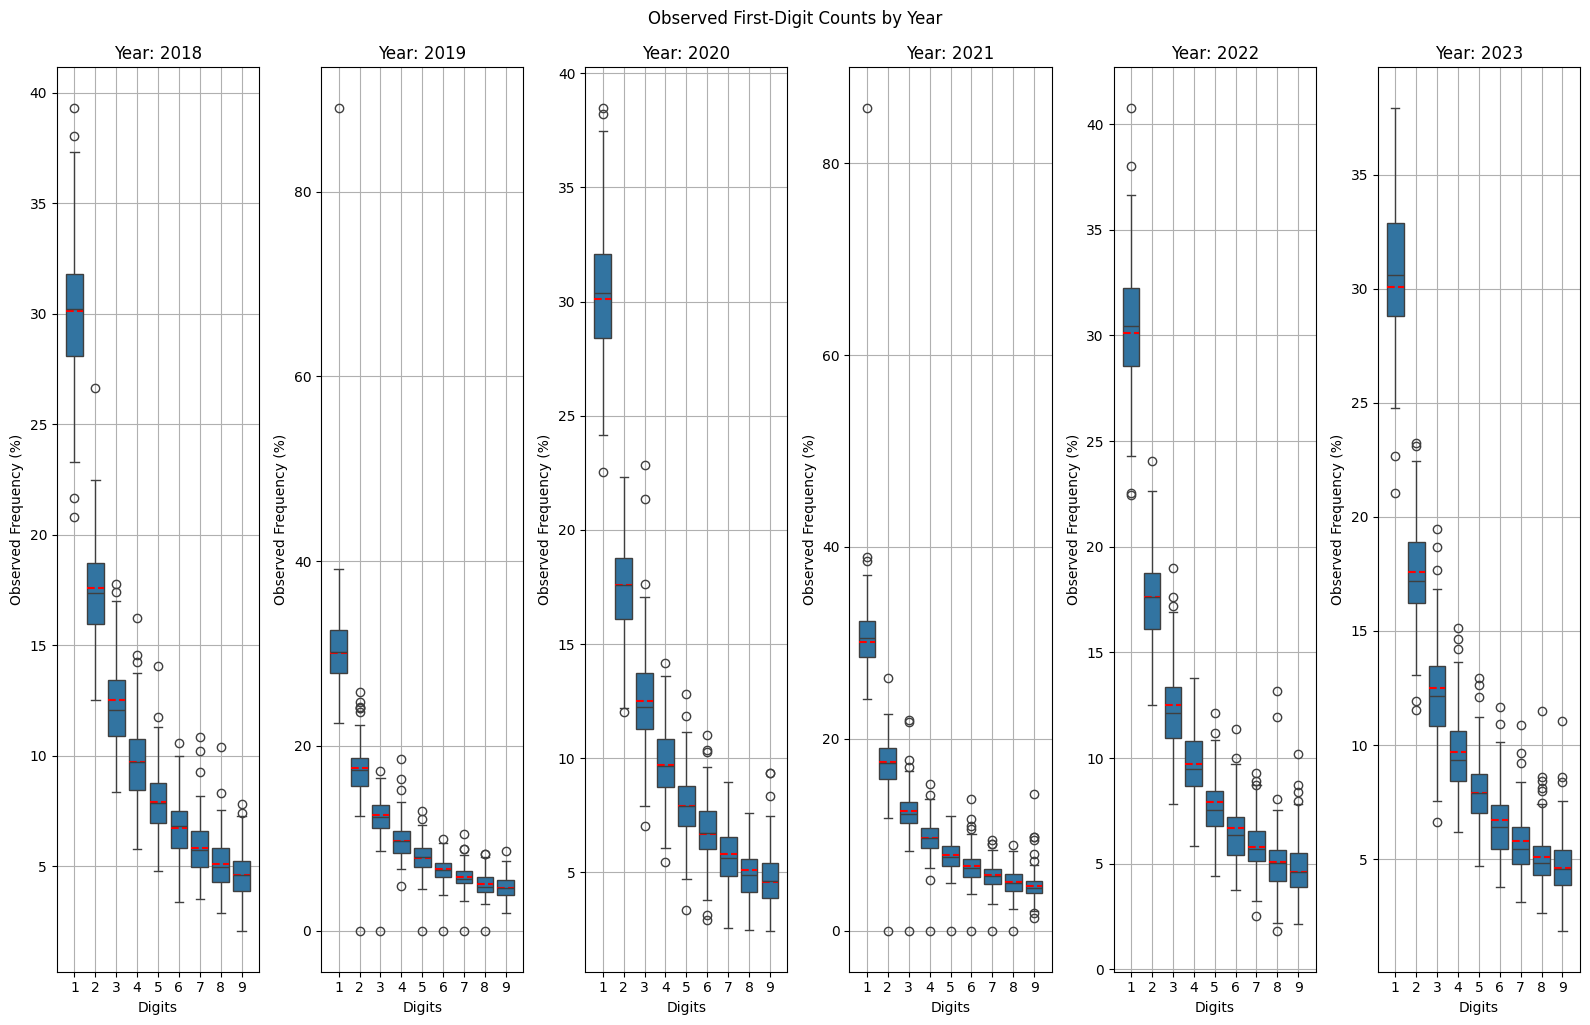

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for boxplots
data_for_boxplot = []
benford_perc = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]  # Expected Benford percentages

for category, companies in digit_counts_by_company.items():
    for company, values in companies.items():
        for entry in values:
            for digit in range(1, 10):
                data_for_boxplot.append({
                    'Year': entry['year'],
                    'Category': category,
                    'Company': company,
                    'Digit': str(digit),
                    'Observed (%)': entry['digit_counts'].get(str(digit), 0),
                    'Benford (%)': benford_perc[digit - 1]
                })

df_boxplot = pd.DataFrame(data_for_boxplot)

# ---------- Boxplot for all categories combined ----------
plt.figure(figsize=(16, 10))
sns.boxplot(
    x='Digit',
    y='Observed (%)',
    data=df_boxplot,
    order=[str(d) for d in range(1, 10)]
)

# Add reference lines for Benford's Law
for i, perc in enumerate(benford_perc):
    plt.hlines(
        y=perc,
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='red',
        linestyles='--',
        label='Benford' if i == 0 else ""
    )

plt.title("Observed First-Digit Counts (All Categories Combined)")
plt.xlabel("Digits")
plt.ylabel("Observed Frequency (%)")
plt.legend(title="Benford Law")
plt.grid(True)
plt.show()

# ---------- Panel of boxplots by year ----------
unique_years = df_boxplot['Year'].unique()
n_years = len(unique_years)

plt.figure(figsize=(16, 10))
for i, year in enumerate(unique_years, start=1):
    plt.subplot(1, n_years, i)
    sns.boxplot(
        x='Digit',
        y='Observed (%)',
        data=df_boxplot[df_boxplot['Year'] == year],
        order=[str(d) for d in range(1, 10)]
    )

    # Add reference lines for Benford's Law
    for j, perc in enumerate(benford_perc):
        plt.hlines(
            y=perc,
            xmin=j - 0.4,
            xmax=j + 0.4,
            color='red',
            linestyles='--',
            label='Benford' if j == 0 else ""
        )

    plt.title(f"Year: {year}")
    plt.xlabel("Digits")
    plt.ylabel("Observed Frequency (%)")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Observed First-Digit Counts by Year", y=1.02)  # Overall title for the panel
plt.show()


Analyzing year 2018:
Analyzing year 2019:
Analyzing year 2020:
Analyzing year 2021:
Analyzing year 2022:
Analyzing year 2023:


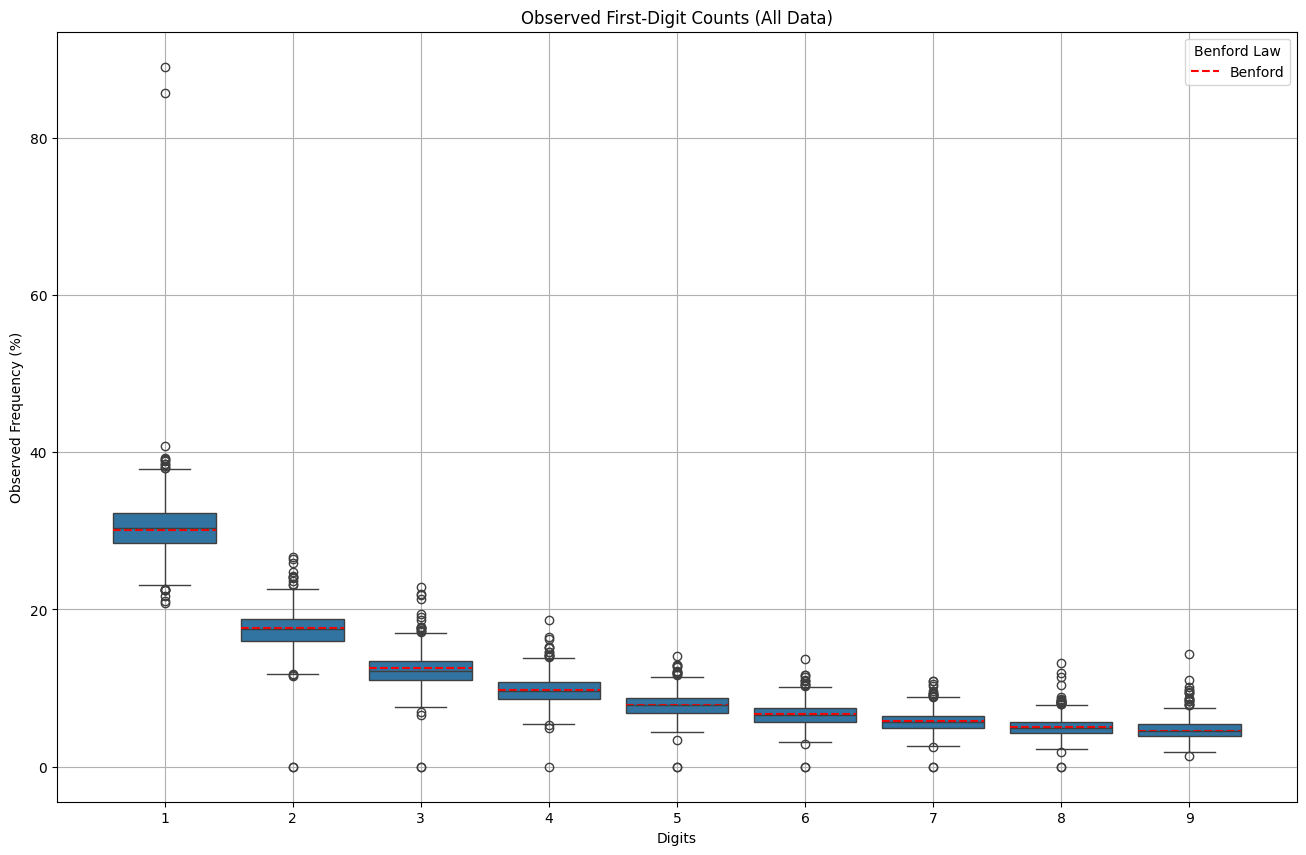

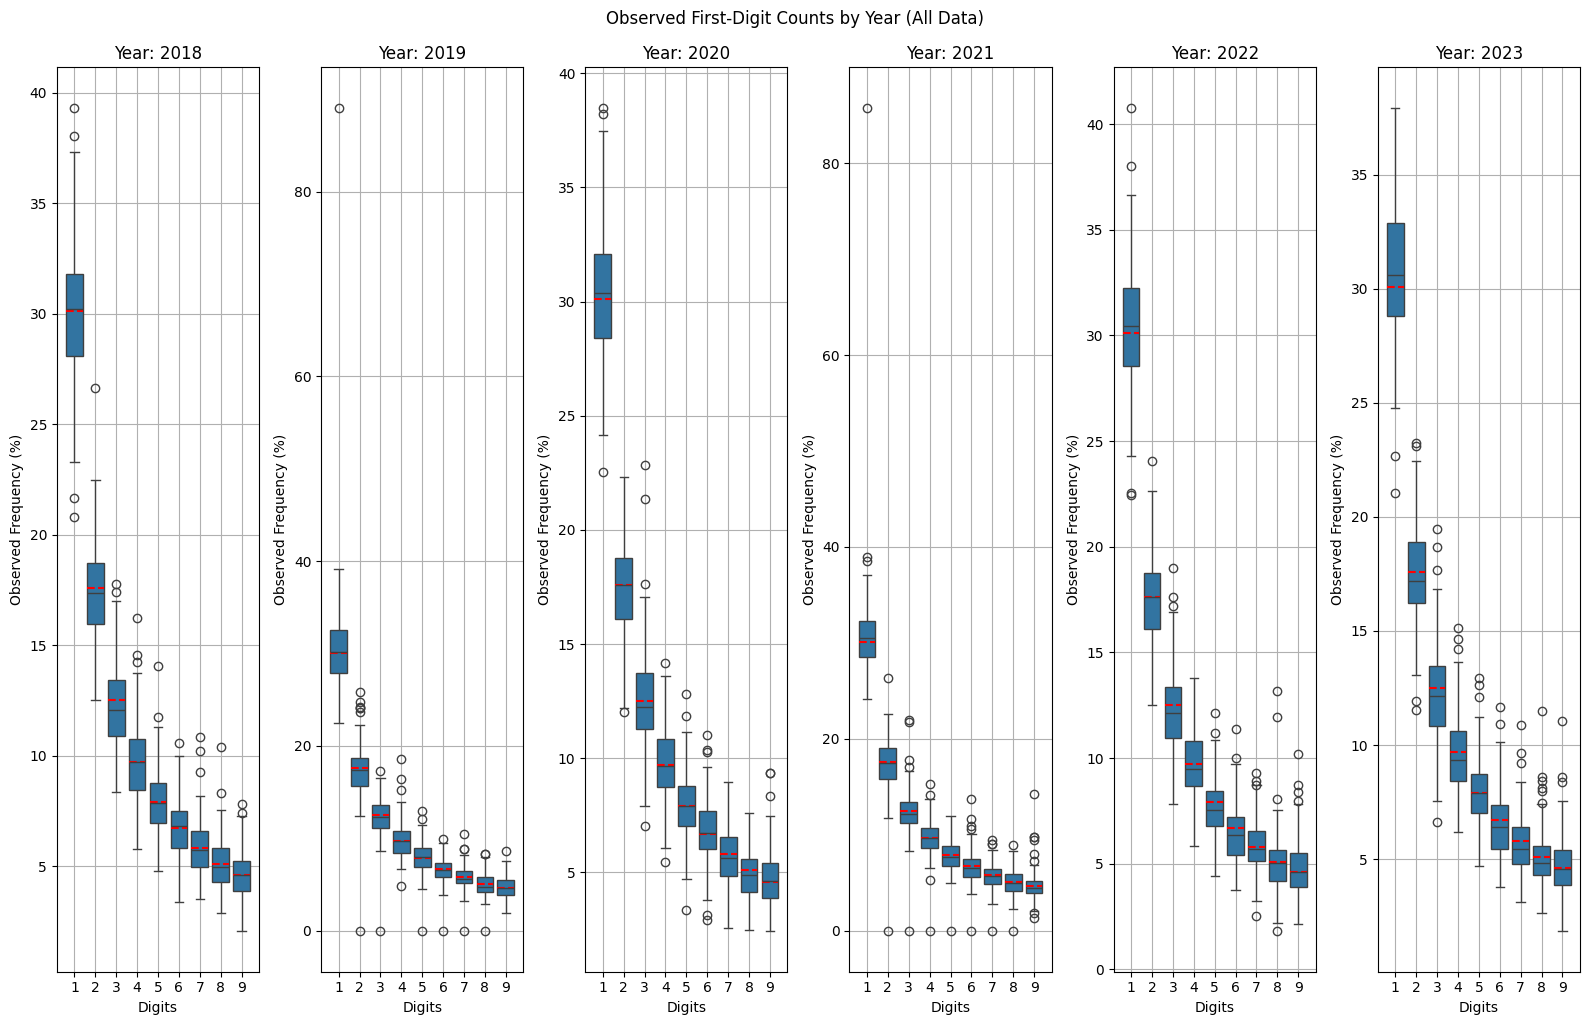

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store first-digit counts for all companies and categories
digit_counts_all = []

# Iterate through years and count digits for all companies and categories
for year, df in dfs_by_year.items():
    print(f"Analyzing year {year}:")

    for category in ["lista_1", "lista_2", "NovoMercado"]:
        df_category = df[df['code'] == category]

        if df_category.empty:
            print(f"No data for category {category} in year {year}.")
            continue

        for company in df_category['DENOM_CIA'].unique():
            df_company = df_category[df_category['DENOM_CIA'] == company]
            freq_company = count_first_digits(df_company)  # Adjust column if necessary

            digit_counts_all.append({
                'Year': year,
                'Category': category,
                'Company': company,
                'Digit': freq_company
            })

# Transform results into a DataFrame for visualization
data_for_boxplot = []
benford_perc = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]  # Benford expected percentages

# Fill the DataFrame with collected data
for entry in digit_counts_all:
    for digit in range(1, 10):
        data_for_boxplot.append({
            'Year': entry['Year'],
            'Category': entry['Category'],
            'Company': entry['Company'],
            'Digit': str(digit),
            'Observed (%)': entry['Digit'].get(str(digit), 0),
            'Benford (%)': benford_perc[digit - 1]
        })

df_boxplot = pd.DataFrame(data_for_boxplot)

# ---------- Overall Boxplot for all data ----------
plt.figure(figsize=(16, 10))
sns.boxplot(
    x='Digit',
    y='Observed (%)',
    data=df_boxplot,
    order=[str(d) for d in range(1, 10)]
)

# Add reference lines for Benford's Law
for i, perc in enumerate(benford_perc):
    plt.hlines(
        y=perc,
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='red',
        linestyles='--',
        label='Benford' if i == 0 else ""
    )

plt.title("Observed First-Digit Counts (All Data)")
plt.xlabel("Digits")
plt.ylabel("Observed Frequency (%)")
plt.legend(title="Benford Law")
plt.grid(True)
plt.show()

# ---------- Panel of Boxplots by Year ----------
unique_years = df_boxplot['Year'].unique()
n_years = len(unique_years)

plt.figure(figsize=(16, 10))
for i, year in enumerate(unique_years, start=1):
    plt.subplot(1, n_years, i)
    sns.boxplot(
        x='Digit',
        y='Observed (%)',
        data=df_boxplot[df_boxplot['Year'] == year],
        order=[str(d) for d in range(1, 10)]
    )

    # Add reference lines for Benford's Law
    for j, perc in enumerate(benford_perc):
        plt.hlines(
            y=perc,
            xmin=j - 0.4,
            xmax=j + 0.4,
            color='red',
            linestyles='--',
            label='Benford' if j == 0 else ""
        )

    plt.title(f"Year: {year}")
    plt.xlabel("Digits")
    plt.ylabel("Observed Frequency (%)")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Observed First-Digit Counts by Year (All Data)", y=1.02)  # Overall title
plt.show()
